Классифицировать пациентов по признаку наличия заболевания сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang)

In [18]:
import pandas as pd
from sklearn import tree

In [19]:
df = pd.read_csv("train_data_tree.csv")
df

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [20]:
X_train = df.drop("num", axis=1)
y_train = df.num

In [35]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

[Text(167.4, 163.07999999999998, 'exang <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]\nclass = Здоров'),
 Text(83.7, 54.360000000000014, 'entropy = 0.903\nsamples = 157\nvalue = [107, 50]\nclass = Здоров'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.826\nsamples = 81\nvalue = [21, 60]\nclass = Болен')]

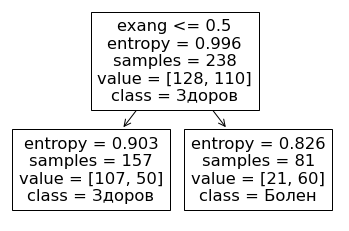

In [36]:
tree.plot_tree(clf, class_names=["Здоров", "Болен"], feature_names=list(X_train.columns))


In [37]:
total, samples_l, samples_r = clf.tree_.n_node_samples
entropy, e_l, e_r = clf.tree_.impurity

In [38]:
ig = entropy - (e_l * samples_l + e_r*samples_r)/total

In [41]:
clf.tree_.children_right

array([ 2, -1, -1], dtype=int64)